In [ ]:
!pip install segmentation_models_pytorch
!pip install wandb

# Iniatial

In [1]:
!mkdir Master
!mkdir Master/IMD2020

!wget -P Master/IMD2020 https://staff.utia.cas.cz/novozada/db/IMD2020.zip

--2024-04-14 19:41:22--  https://staff.utia.cas.cz/novozada/db/IMD2020.zip
Resolving staff.utia.cas.cz (staff.utia.cas.cz)... 147.231.16.197
Connecting to staff.utia.cas.cz (staff.utia.cas.cz)|147.231.16.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 592836398 (565M) [application/zip]
Saving to: ‘Master/IMD2020/IMD2020.zip’

IMD2020.zip         100%[===================>] 565.37M  6.93MB/s    in 87s     

2024-04-14 19:42:50 (6.47 MB/s) - ‘Master/IMD2020/IMD2020.zip’ saved [592836398/592836398]



In [ ]:
!unzip /content/Master/IMD2020/IMD2020.zip -d Master/IMD2020

In [3]:
!rm -r /content/Master/IMD2020/IMD2020.zip

In [ ]:
# import shutil

# shutil.rmtree('/Project/Dataset', ignore_errors=True)

# Libraries

In [6]:
# For managing COCO dataset
# from pycocotools.coco import COCO

# For creating and managing folder/ files
import glob
import os
import shutil

# For managing images
from PIL import Image
import skimage.io as io

# Basic libraries
import numpy as np
import pandas as pd
import random
import cv2

# For plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import wandb

# For importing models and working with them
## Torch
import torch
import torch.utils.data # for Dataset
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
import segmentation_models_pytorch as smp

## Torchvision
import torchvision
from torchvision.transforms import transforms

# For creating train - test splits
from sklearn.model_selection import train_test_split

import pathlib
import pylab
import requests
from io import BytesIO
from pprint import pprint
from tqdm import tqdm
import time
from imutils import paths

# Performance Metrics
from sklearn.metrics import multilabel_confusion_matrix


# Functions - to have them separated in files
import CalcMetrics as cm
import BinaryMasks as bm
import TrainModel as train
import ValidateModel as val
import CreateDataset as crd
import DisplayMetrics as dm
import PlotResults as pr


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


# %matplotlib inline

cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


# Data

## Data Preparation

In [11]:
# Example usage:
dataset_path = '/content/Master/IMD2020'
num_folders = 300  # Number of folders to read
original_images, altered_images, masks = crd.load_dataset(dataset_path, num_folders)


# You can apply any transformations needed before creating the dataset
transforms_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Define transformations for test (optional)
transforms_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Create the dataset
dataset = crd.SegmentationDataset(original_images, altered_images, masks, transforms = transforms_train)


Starting loading dataset
Error loading images for folder 1d6mhe: [Errno 2] No such file or directory: '/content/Master/IMD2020/1d6mhe/1d6mhe_orig.jpg'


## Training

Dataset length: 299
[INFO] TEST_SPLIT = 0.3 ...
Splits, Datasets, and Dataloaders
[INFO] Total time taken to create the dataset and dataloader: 0.00s
[INFO] found 299 examples in the training set...
trainSteps = 11, testSteps = 5, valSteps = 1
[INFO] Training the network for 10 epochs...


 10%|█         | 1/10 [00:11<01:46, 11.82s/it]

[INFO] EPOCH: 1/10
Train loss: 0.686497


 20%|██        | 2/10 [00:23<01:33, 11.70s/it]

[INFO] EPOCH: 2/10
Train loss: 0.597526


 30%|███       | 3/10 [00:35<01:22, 11.75s/it]

[INFO] EPOCH: 3/10
Train loss: 0.531318


 40%|████      | 4/10 [00:47<01:10, 11.79s/it]

[INFO] EPOCH: 4/10
Train loss: 0.476847


 50%|█████     | 5/10 [00:58<00:58, 11.79s/it]

[INFO] EPOCH: 5/10
Train loss: 0.441271


 60%|██████    | 6/10 [01:10<00:47, 11.80s/it]

[INFO] EPOCH: 6/10
Train loss: 0.414320


 70%|███████   | 7/10 [01:22<00:35, 11.85s/it]

[INFO] EPOCH: 7/10
Train loss: 0.389432


 80%|████████  | 8/10 [01:34<00:23, 11.87s/it]

[INFO] EPOCH: 8/10
Train loss: 0.362926


 90%|█████████ | 9/10 [01:46<00:11, 11.88s/it]

[INFO] EPOCH: 9/10
Train loss: 0.351023


100%|██████████| 10/10 [01:58<00:00, 11.82s/it]

[INFO] EPOCH: 10/10
Train loss: 0.333328
[INFO] Total time taken to train the model: 118.18s


Average accuracy = 60.0%
Average precision = 60.0%
Average recall = 60.0%
Average f1_score = 60.0%
Average DICE = -30.0%
Average IOU = 10.0%




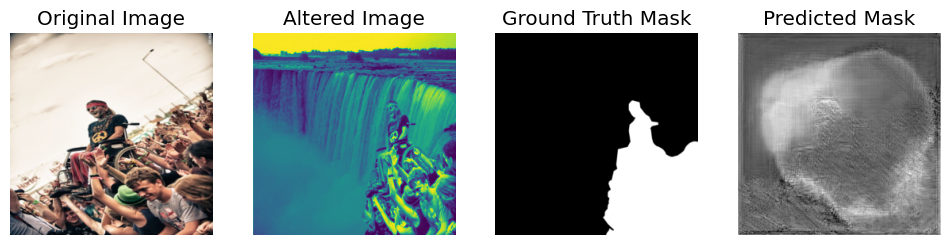

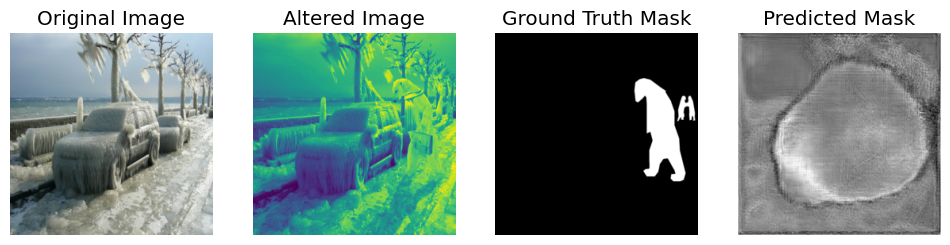

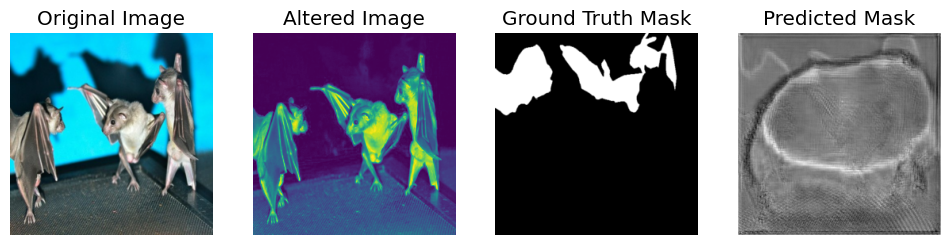

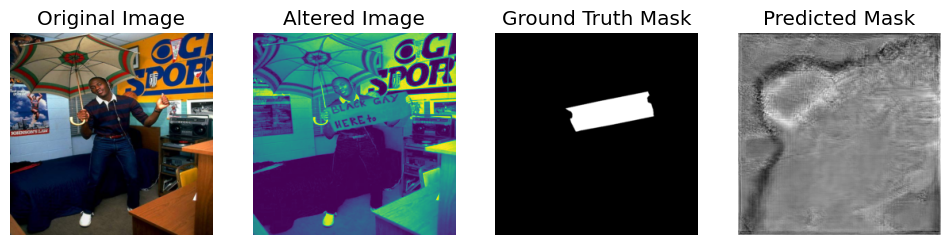

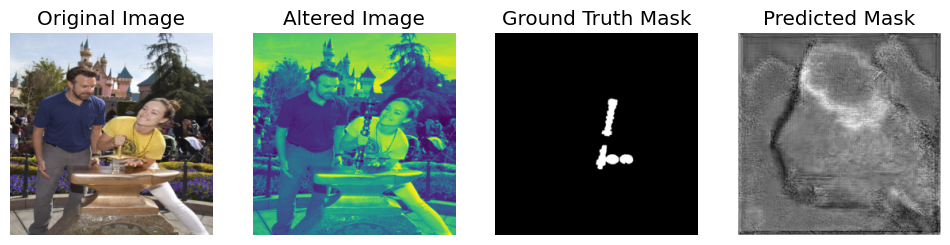

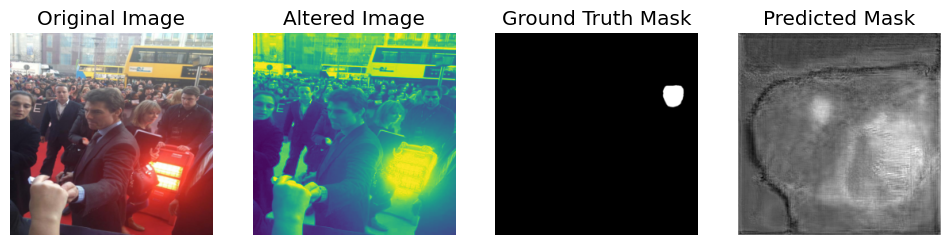

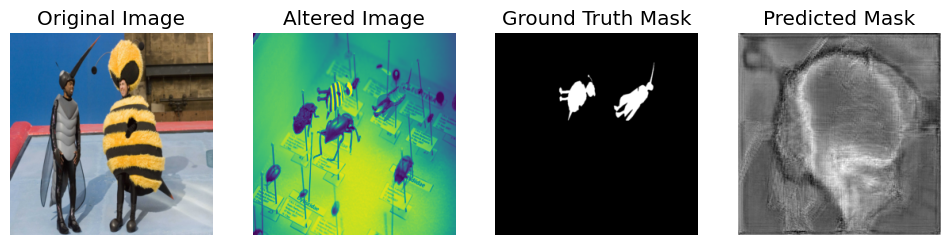

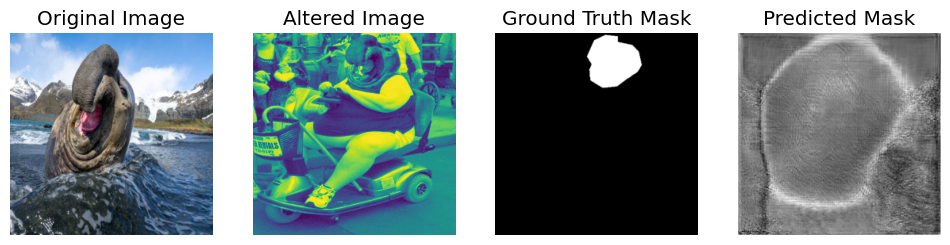

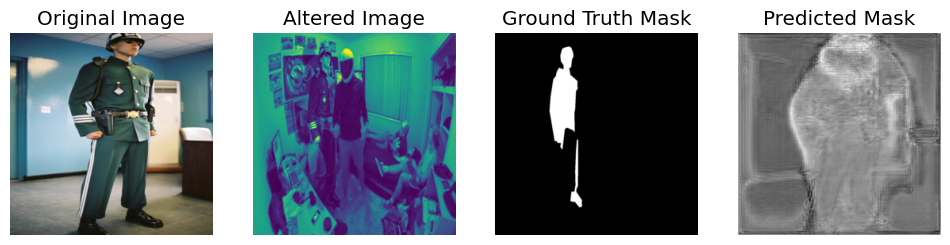

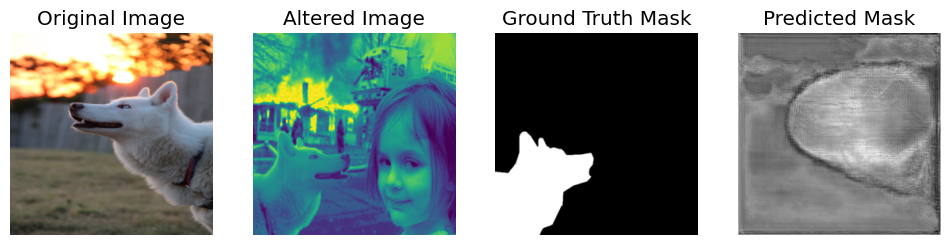

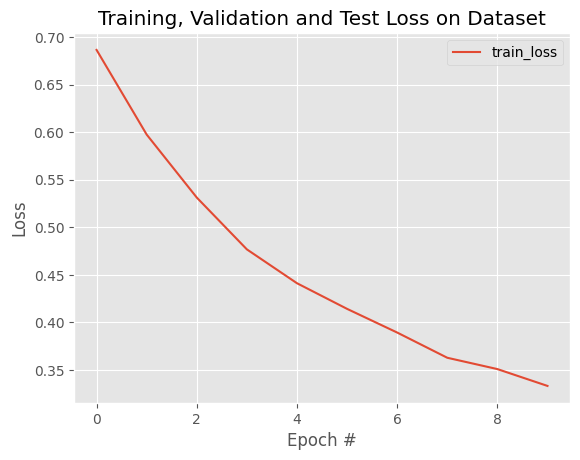



[INFO] Training the network for 20 epochs...


  5%|▌         | 1/20 [00:11<03:42, 11.70s/it]

[INFO] EPOCH: 1/20
Train loss: 0.306971


 10%|█         | 2/20 [00:23<03:30, 11.69s/it]

[INFO] EPOCH: 2/20
Train loss: 0.291927


 15%|█▌        | 3/20 [00:35<03:19, 11.71s/it]

[INFO] EPOCH: 3/20
Train loss: 0.272221


 20%|██        | 4/20 [00:46<03:08, 11.76s/it]

[INFO] EPOCH: 4/20
Train loss: 0.260457


 25%|██▌       | 5/20 [00:58<02:56, 11.79s/it]

[INFO] EPOCH: 5/20
Train loss: 0.244587


 30%|███       | 6/20 [01:10<02:45, 11.81s/it]

[INFO] EPOCH: 6/20
Train loss: 0.235867


 35%|███▌      | 7/20 [01:22<02:34, 11.89s/it]

[INFO] EPOCH: 7/20
Train loss: 0.223402


 40%|████      | 8/20 [01:34<02:22, 11.90s/it]

[INFO] EPOCH: 8/20
Train loss: 0.212210


 45%|████▌     | 9/20 [01:46<02:11, 11.92s/it]

[INFO] EPOCH: 9/20
Train loss: 0.203515


 50%|█████     | 10/20 [01:58<01:59, 11.95s/it]

[INFO] EPOCH: 10/20
Train loss: 0.194891


 55%|█████▌    | 11/20 [02:10<01:47, 11.95s/it]

[INFO] EPOCH: 11/20
Train loss: 0.185866


 60%|██████    | 12/20 [02:22<01:35, 11.96s/it]

[INFO] EPOCH: 12/20
Train loss: 0.176541


 65%|██████▌   | 13/20 [02:34<01:23, 11.93s/it]

[INFO] EPOCH: 13/20
Train loss: 0.168079


 70%|███████   | 14/20 [02:46<01:11, 11.88s/it]

[INFO] EPOCH: 14/20
Train loss: 0.158641


 75%|███████▌  | 15/20 [02:57<00:59, 11.87s/it]

[INFO] EPOCH: 15/20
Train loss: 0.152384


 80%|████████  | 16/20 [03:09<00:47, 11.78s/it]

[INFO] EPOCH: 16/20
Train loss: 0.146796


 85%|████████▌ | 17/20 [03:21<00:35, 11.73s/it]

[INFO] EPOCH: 17/20
Train loss: 0.141391


 90%|█████████ | 18/20 [03:32<00:23, 11.75s/it]

[INFO] EPOCH: 18/20
Train loss: 0.135183


 95%|█████████▌| 19/20 [03:44<00:11, 11.74s/it]

[INFO] EPOCH: 19/20
Train loss: 0.129903


100%|██████████| 20/20 [03:56<00:00, 11.82s/it]

[INFO] EPOCH: 20/20
Train loss: 0.125798
[INFO] Total time taken to train the model: 236.51s


Average accuracy = 60.0%
Average precision = 60.0%
Average recall = 60.0%
Average f1_score = 60.0%
Average DICE = -12.0%
Average IOU = 10.0%




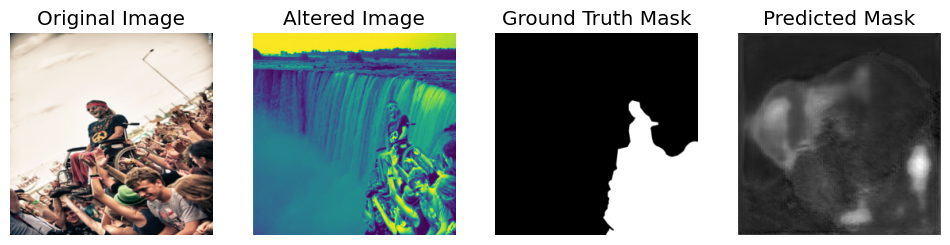

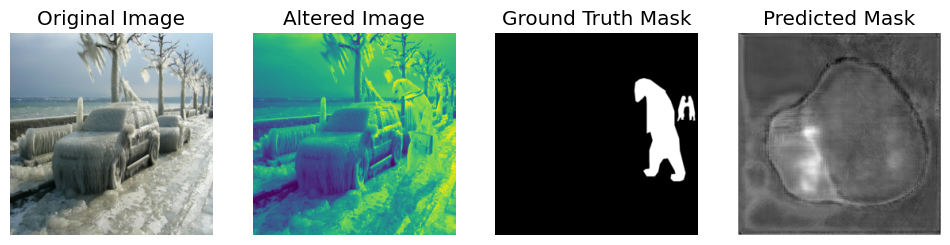

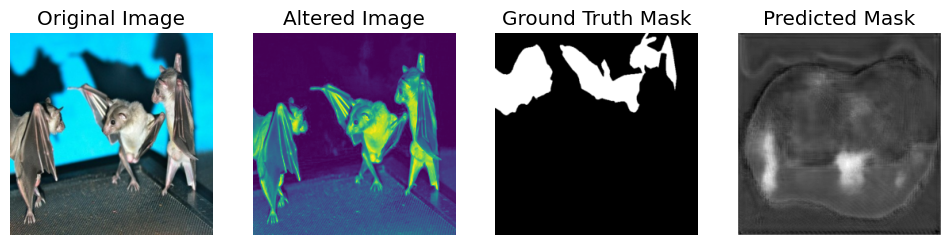

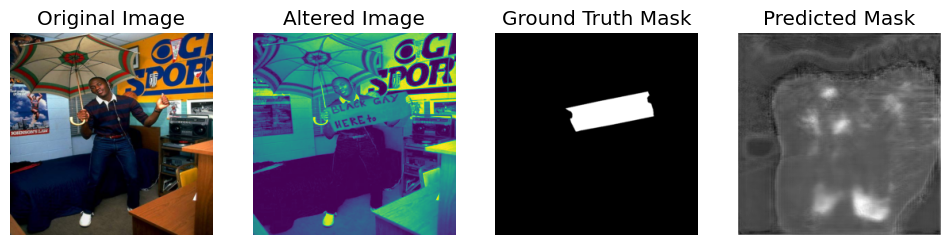

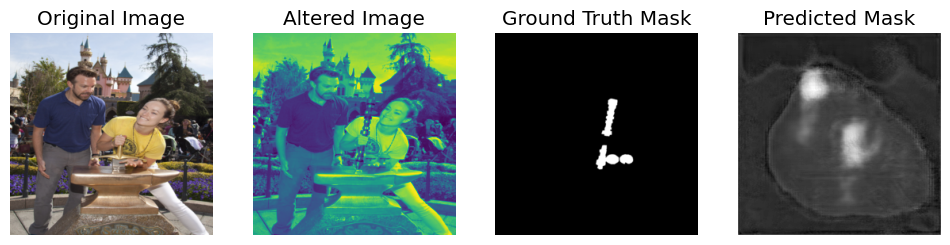

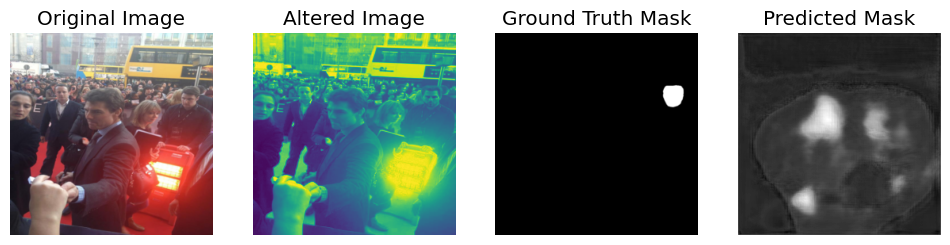

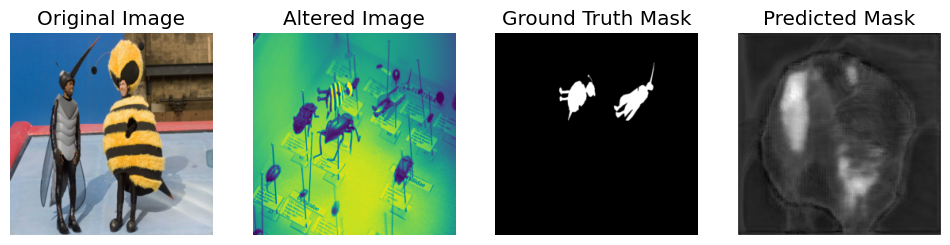

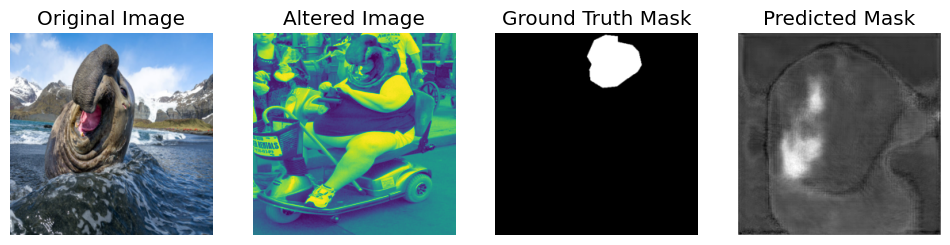

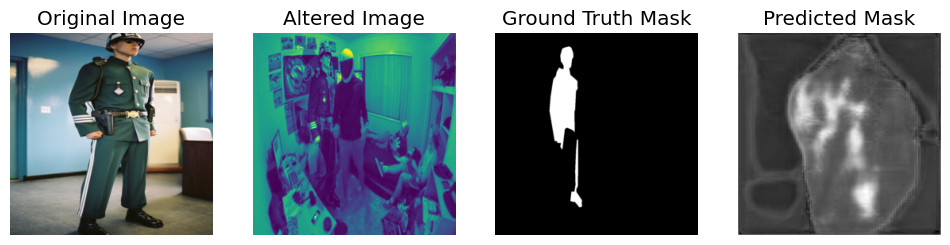

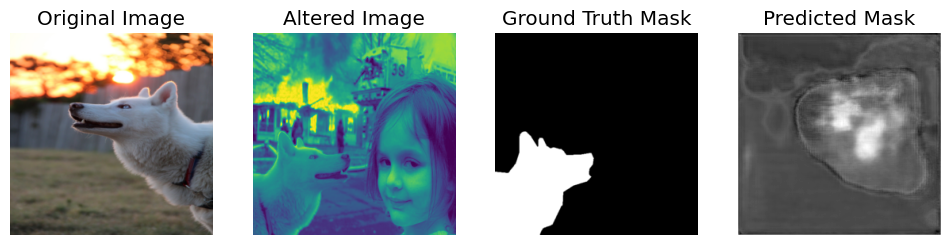

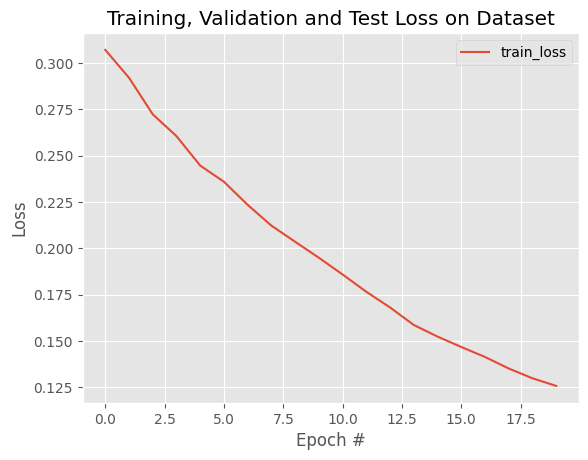



[INFO] Training the network for 50 epochs...


  2%|▏         | 1/50 [00:12<09:58, 12.22s/it]

[INFO] EPOCH: 1/50
Train loss: 0.122788


  4%|▍         | 2/50 [00:24<09:40, 12.08s/it]

[INFO] EPOCH: 2/50
Train loss: 0.117929


  6%|▌         | 3/50 [00:36<09:28, 12.09s/it]

[INFO] EPOCH: 3/50
Train loss: 0.113623


  8%|▊         | 4/50 [00:48<09:14, 12.05s/it]

[INFO] EPOCH: 4/50
Train loss: 0.108201


 10%|█         | 5/50 [01:00<09:01, 12.03s/it]

[INFO] EPOCH: 5/50
Train loss: 0.105605


 12%|█▏        | 6/50 [01:12<08:49, 12.03s/it]

[INFO] EPOCH: 6/50
Train loss: 0.102710


 14%|█▍        | 7/50 [01:24<08:36, 12.02s/it]

[INFO] EPOCH: 7/50
Train loss: 0.098170


 16%|█▌        | 8/50 [01:36<08:23, 12.00s/it]

[INFO] EPOCH: 8/50
Train loss: 0.092683


 18%|█▊        | 9/50 [01:48<08:10, 11.96s/it]

[INFO] EPOCH: 9/50
Train loss: 0.089703


 20%|██        | 10/50 [01:59<07:54, 11.87s/it]

[INFO] EPOCH: 10/50
Train loss: 0.086937


 22%|██▏       | 11/50 [02:11<07:41, 11.85s/it]

[INFO] EPOCH: 11/50
Train loss: 0.086077


 24%|██▍       | 12/50 [02:23<07:30, 11.87s/it]

[INFO] EPOCH: 12/50
Train loss: 0.084367


 26%|██▌       | 13/50 [02:35<07:19, 11.87s/it]

[INFO] EPOCH: 13/50
Train loss: 0.080240


 28%|██▊       | 14/50 [02:47<07:06, 11.83s/it]

[INFO] EPOCH: 14/50
Train loss: 0.077302


 30%|███       | 15/50 [02:59<06:54, 11.85s/it]

[INFO] EPOCH: 15/50
Train loss: 0.074412


 32%|███▏      | 16/50 [03:10<06:42, 11.83s/it]

[INFO] EPOCH: 16/50
Train loss: 0.071424


 34%|███▍      | 17/50 [03:22<06:30, 11.85s/it]

[INFO] EPOCH: 17/50
Train loss: 0.070734


 36%|███▌      | 18/50 [03:34<06:18, 11.82s/it]

[INFO] EPOCH: 18/50
Train loss: 0.068010


 38%|███▊      | 19/50 [03:46<06:07, 11.84s/it]

[INFO] EPOCH: 19/50
Train loss: 0.069176


 40%|████      | 20/50 [03:58<05:54, 11.83s/it]

[INFO] EPOCH: 20/50
Train loss: 0.066397


 42%|████▏     | 21/50 [04:10<05:44, 11.86s/it]

[INFO] EPOCH: 21/50
Train loss: 0.063222


 44%|████▍     | 22/50 [04:21<05:31, 11.83s/it]

[INFO] EPOCH: 22/50
Train loss: 0.060484


 46%|████▌     | 23/50 [04:33<05:18, 11.80s/it]

[INFO] EPOCH: 23/50
Train loss: 0.058506


 48%|████▊     | 24/50 [04:45<05:07, 11.82s/it]

[INFO] EPOCH: 24/50
Train loss: 0.056937


 50%|█████     | 25/50 [04:57<04:56, 11.86s/it]

[INFO] EPOCH: 25/50
Train loss: 0.054799


 52%|█████▏    | 26/50 [05:09<04:45, 11.88s/it]

[INFO] EPOCH: 26/50
Train loss: 0.054037


 54%|█████▍    | 27/50 [05:21<04:33, 11.88s/it]

[INFO] EPOCH: 27/50
Train loss: 0.052079


 56%|█████▌    | 28/50 [05:33<04:21, 11.86s/it]

[INFO] EPOCH: 28/50
Train loss: 0.050857


 58%|█████▊    | 29/50 [05:44<04:08, 11.84s/it]

[INFO] EPOCH: 29/50
Train loss: 0.049704


 60%|██████    | 30/50 [05:56<03:56, 11.85s/it]

[INFO] EPOCH: 30/50
Train loss: 0.049321


 62%|██████▏   | 31/50 [06:08<03:44, 11.84s/it]

[INFO] EPOCH: 31/50
Train loss: 0.048413


 64%|██████▍   | 32/50 [06:20<03:33, 11.85s/it]

[INFO] EPOCH: 32/50
Train loss: 0.047249


 66%|██████▌   | 33/50 [06:32<03:20, 11.82s/it]

[INFO] EPOCH: 33/50
Train loss: 0.046082


 68%|██████▊   | 34/50 [06:44<03:09, 11.84s/it]

[INFO] EPOCH: 34/50
Train loss: 0.044671


 70%|███████   | 35/50 [06:55<02:57, 11.83s/it]

[INFO] EPOCH: 35/50
Train loss: 0.043059


 72%|███████▏  | 36/50 [07:07<02:46, 11.87s/it]

[INFO] EPOCH: 36/50
Train loss: 0.042788


 74%|███████▍  | 37/50 [07:19<02:34, 11.92s/it]

[INFO] EPOCH: 37/50
Train loss: 0.041775


 76%|███████▌  | 38/50 [07:31<02:23, 11.98s/it]

[INFO] EPOCH: 38/50
Train loss: 0.040309


 78%|███████▊  | 39/50 [07:43<02:11, 11.99s/it]

[INFO] EPOCH: 39/50
Train loss: 0.040343


 80%|████████  | 40/50 [07:56<02:00, 12.05s/it]

[INFO] EPOCH: 40/50
Train loss: 0.038588


 82%|████████▏ | 41/50 [08:08<01:48, 12.08s/it]

[INFO] EPOCH: 41/50
Train loss: 0.037947


 84%|████████▍ | 42/50 [08:20<01:36, 12.08s/it]

[INFO] EPOCH: 42/50
Train loss: 0.037246


 86%|████████▌ | 43/50 [08:32<01:24, 12.07s/it]

[INFO] EPOCH: 43/50
Train loss: 0.035976


 88%|████████▊ | 44/50 [08:44<01:12, 12.06s/it]

[INFO] EPOCH: 44/50
Train loss: 0.035703


 90%|█████████ | 45/50 [08:56<01:00, 12.06s/it]

[INFO] EPOCH: 45/50
Train loss: 0.034932


 92%|█████████▏| 46/50 [09:08<00:48, 12.08s/it]

[INFO] EPOCH: 46/50
Train loss: 0.034996


 94%|█████████▍| 47/50 [09:20<00:36, 12.07s/it]

[INFO] EPOCH: 47/50
Train loss: 0.034240


 96%|█████████▌| 48/50 [09:32<00:24, 12.06s/it]

[INFO] EPOCH: 48/50
Train loss: 0.033575


 98%|█████████▊| 49/50 [09:44<00:12, 12.09s/it]

[INFO] EPOCH: 49/50
Train loss: 0.034034


100%|██████████| 50/50 [09:56<00:00, 11.94s/it]

[INFO] EPOCH: 50/50
Train loss: 0.033264
[INFO] Total time taken to train the model: 596.99s


Average accuracy = 60.0%
Average precision = 60.0%
Average recall = 60.0%
Average f1_score = 60.0%
Average DICE = -7.000000000000001%
Average IOU = 10.0%




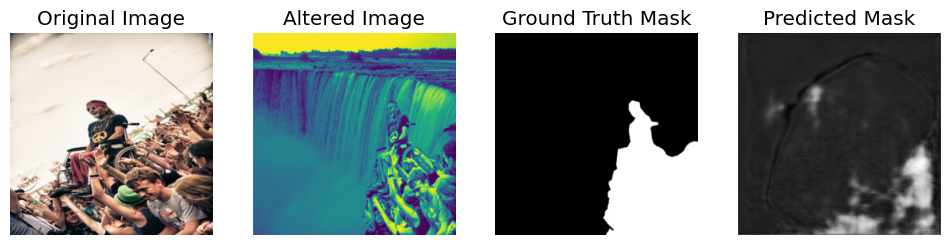

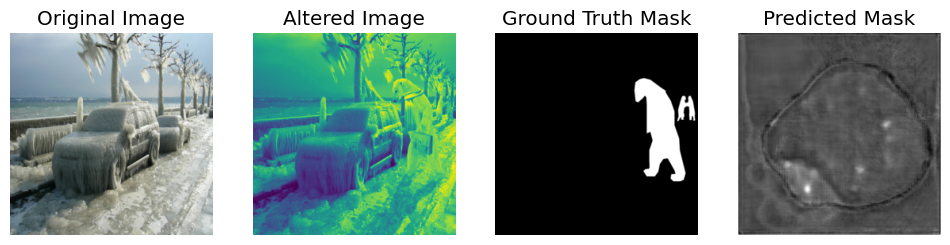

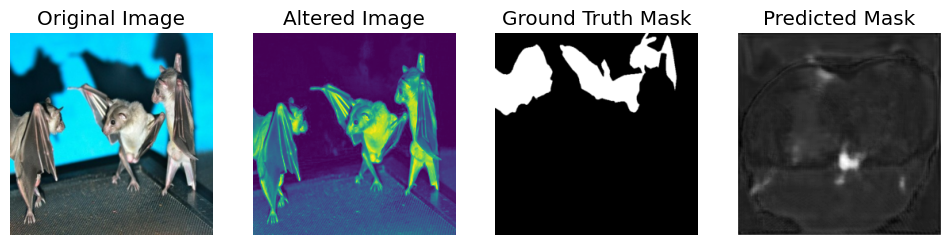

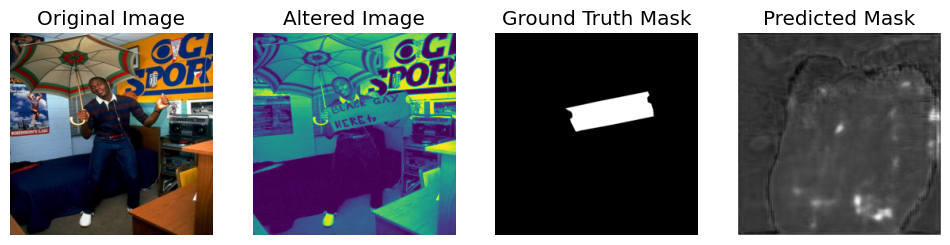

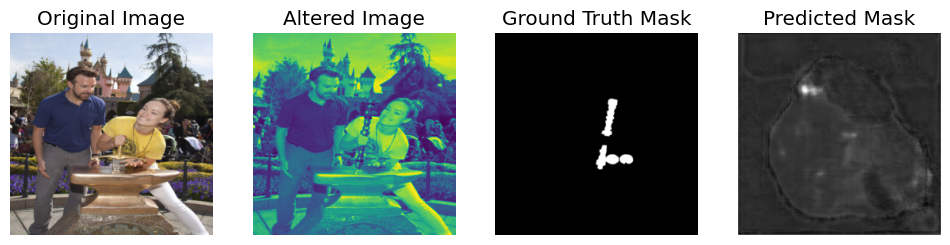

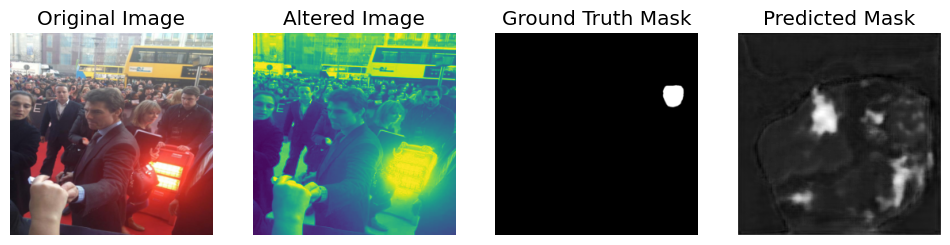

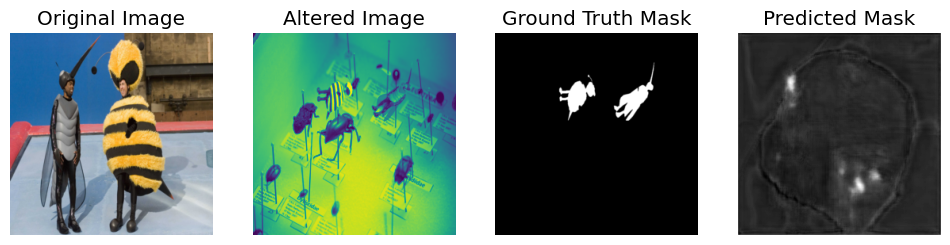

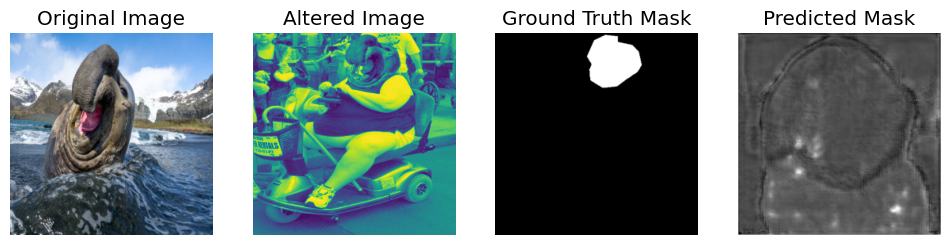

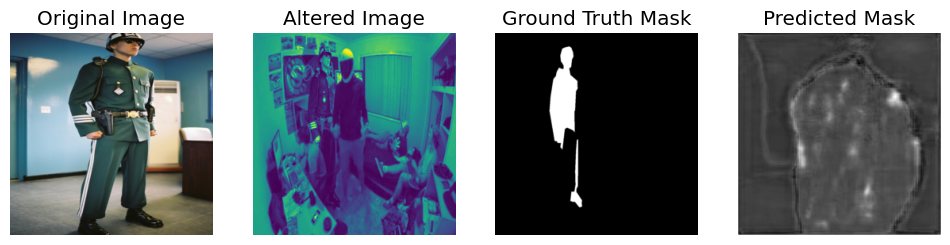

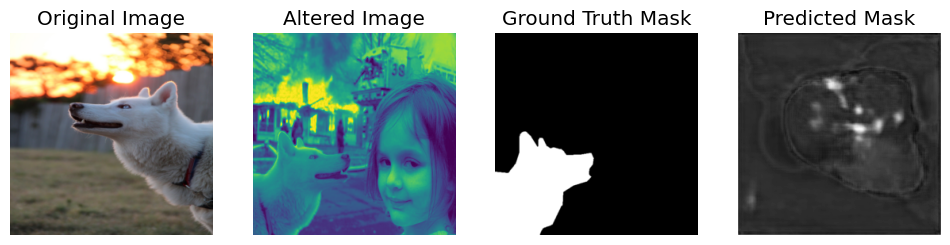

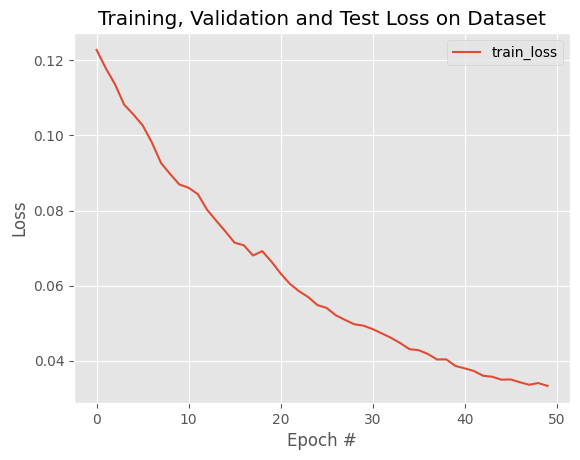



[INFO] Training the network for 100 epochs...


  1%|          | 1/100 [00:11<19:37, 11.90s/it]

[INFO] EPOCH: 1/100
Train loss: 0.034061


  2%|▏         | 2/100 [00:23<19:19, 11.83s/it]

[INFO] EPOCH: 2/100
Train loss: 0.032079


  3%|▎         | 3/100 [00:35<19:00, 11.76s/it]

[INFO] EPOCH: 3/100
Train loss: 0.031872


  4%|▍         | 4/100 [00:47<18:54, 11.82s/it]

[INFO] EPOCH: 4/100
Train loss: 0.030814


  5%|▌         | 5/100 [00:59<18:41, 11.80s/it]

[INFO] EPOCH: 5/100
Train loss: 0.030066


  6%|▌         | 6/100 [01:10<18:30, 11.81s/it]

[INFO] EPOCH: 6/100
Train loss: 0.029122


KeyboardInterrupt: 

In [12]:
# wandb.login()


# Initialize the U-Net model
unet = smp.Unet(
                encoder_name = "resnet101",
                encoder_weights = "imagenet",
                in_channels = 3,  # Assuming 3 channels for both original and altered images
                classes = 1  # Output classes (1 for mask)
               ).to(device)

# Define hyperparameters
INIT_LR = 0.0001
BATCH_SIZE = 16
NUM_EPOCHS = [10, 20, 50, 100, 150]
TEST_SPLIT = [0.3] # 0.3
VALID_SPLIT = 0.1 # 0.1

# Initialize loss function and optimizer
lossFunc = nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(unet.parameters(), lr=INIT_LR)


# Create DataLoader for the dataset
trainLoader = DataLoader(dataset, shuffle = True, batch_size = BATCH_SIZE)
print("Dataset length:", len(trainLoader.dataset))

# Calculate steps per epoch for training set
trainSteps = len(trainLoader)

for tts in TEST_SPLIT:
    print("[INFO] TEST_SPLIT = {} ...".format(tts))

    print("Splits, Datasets, and Dataloaders")
    startTime = time.time()

    train_orig_images, test_orig_images, train_altered_images, test_altered_images, train_masks, test_masks = train_test_split(original_images, altered_images, masks, test_size = tts, random_state = 42)
    train_orig_images, val_orig_images, train_altered_images, val_altered_images, train_masks, val_masks = train_test_split(train_orig_images, train_altered_images, train_masks, test_size = VALID_SPLIT, random_state = 42)

    # Create datasets and data loaders for training, validation, and testing sets
    train_dataset = crd.SegmentationDataset(train_orig_images, train_altered_images, train_masks, transforms = transforms_train)
    val_dataset   = crd.SegmentationDataset(val_orig_images,   val_altered_images,   val_masks,   transforms = transforms_test)
    test_dataset  = crd.SegmentationDataset(test_orig_images,  test_altered_images,  test_masks,  transforms = transforms_test)

    train_loader = DataLoader(train_dataset, shuffle = True,  batch_size = BATCH_SIZE)
    val_loader   = DataLoader(val_dataset,   shuffle = False, batch_size = BATCH_SIZE)
    test_loader  = DataLoader(test_dataset,  shuffle = False, batch_size = BATCH_SIZE)


    endTime = time.time()
    print("[INFO] Total time taken to create the dataset and dataloader: {:.2f}s".format(endTime - startTime))

    print(f"[INFO] found {len(dataset)} examples in the training set...")

    # calculate steps per epoch for training set
    trainSteps = len(train_dataset) // BATCH_SIZE
    testSteps  = len(test_dataset) // BATCH_SIZE
    valSteps   = len(val_dataset) // BATCH_SIZE

    print(f"trainSteps = {trainSteps}, testSteps = {testSteps}, valSteps = {valSteps}")

    for epoch in NUM_EPOCHS:

#         run = wandb.init(
#                           # Set the project where this run will be logged
#                           project = "my-project",
#                           # Track hyperparameters and run metadata
#                           config={
#                               "learning_rate": INIT_LR,
#                               "epochs": epoch,
#                               "batch": BATCH_SIZE
#                                  },
#                         )

        # Initialize dictionary to store training history
        H = {"train_loss": [], "val_loss": [], "test_loss": []}
        Perf_Metrics = {"accuracy": [], "precision": [], "recall": [], "f1_score": []}
        Dice_IOU = {"dice": [], "iou": []}

        print("[INFO] Training the network for {} epochs...".format(epoch))

        startTime = time.time()

        for e in tqdm(range(epoch)):

            # initialize variables for output
            totalTrainLoss, totalTestLoss, totalValLoss = 0, 0, 0
            accuracy_scores, precision_score, recall_scores, f1_scores = 0, 0, 0, 0
            dice_scores, iou_scores = 0, 0



            #### TRINING LOOP ####
            unet.train() # unet.train.train()
            for orig_images, altered_images, masks in train_loader:
                images, altered_images, masks = orig_images.to(device), altered_images.to(device), masks.to(device)

                opt.zero_grad()
                pred_masks = unet(images) # they are not binary => the binary masks are displayed using the vizualize function with a threshold
                # pred_masks = torch.sigmoid(pred_masks)

                loss = lossFunc(pred_masks, masks)
                loss.backward()
                opt.step()

                pred_masks = (pred_masks > 0.5).float()

                totalTrainLoss += loss.item()

            avg_train_loss = totalTrainLoss / len(train_loader)




            #### VALIDATION LOOP ####
            unet.eval()
            with torch.no_grad():
                total_val_loss = 0
                for orig_images, altered_images, masks in val_loader:
                    orig_images, altered_images, masks = orig_images.to(device), altered_images.to(device), masks.to(device)
                    pred_masks = unet(orig_images)
                    val_loss = lossFunc(pred_masks, masks)

                    totalValLoss += val_loss.item()

            avg_val_loss = totalValLoss / len(val_loader)

            # Log the losses to WandB
#             wandb.log({"train_loss": avg_train_loss, "val_loss": avg_val_loss, "epoch": e})



            #### TESTING LOOP ####
            unet.eval()
            with torch.no_grad():
                for orig_images, altered_images, masks in test_loader:
                    orig_images, altered_images, masks = orig_images.to(device), altered_images.to(device), masks.to(device)
                    pred_masks = unet(orig_images)


                    # calculate Dice coefficient and IoU score
                    metrics = cm.calculate_metrics(masks.cpu().numpy(), pred_masks.cpu().numpy())
                    accuracy, precision, recall, f1_score = metrics

                    dice_coefficient = cm.calculate_dice_coefficient(masks.cpu().numpy(), pred_masks.cpu().numpy())
                    iou = cm.calculate_iou(masks.cpu().numpy(), pred_masks.cpu().numpy())

                    # avg metrics
                    accuracy_scores += accuracy
                    precision_score += precision
                    recall_scores += recall
                    f1_scores += f1_score

                    dice_scores += dice_coefficient
                    iou_scores += iou


                # visualize_images(images.cpu(), altered_images.cpu(), masks.cpu(), pred_masks.cpu()) #, threshold = tenth_highest_value)


            # Averaging performance metrics and updating training history
            avgTrainLoss = totalTrainLoss / trainSteps
            avgValLoss = totalValLoss / valSteps
            avgTestLoss = totalTestLoss / testSteps

            accuracy_scores = accuracy_scores / testSteps #testSteps
            precision_score = precision_score / testSteps
            recall_scores = recall_scores / testSteps
            f1_scores = f1_scores / testSteps

            dice_scores = dice_scores / testSteps
            iou_scores = iou_scores / testSteps

            # update our training history
            H["train_loss"].append(avgTrainLoss)
            H["val_loss"].append(avgValLoss)
            H["test_loss"].append(avgTestLoss)

            # update our performance metrics history
            Perf_Metrics["accuracy"].append(accuracy_scores)
            Perf_Metrics["precision"].append(precision_score)
            Perf_Metrics["recall"].append(recall_scores)
            Perf_Metrics["f1_score"].append(f1_scores)


            # update our dice and IOU score history
            Dice_IOU["dice"].append(dice_scores)
            Dice_IOU["iou"].append(iou_scores)

            # Print training loss
            print("[INFO] EPOCH: {}/{}".format(e + 1, epoch))
            print("Train loss: {:.6f}".format(avgTrainLoss))

#             wandb.log({"accuracy": accuracy_scores, "precision": precision_score, "loss": avgTrainLoss})

        # Display total time taken to perform the training
        endTime = time.time()
        print("[INFO] Total time taken to train the model: {:.2f}s".format(endTime - startTime))


        # Display performance metrics
        print('\n')
        dm.display_metrics(Perf_Metrics, Dice_IOU)


        # Plot results - images
        print('\n')
        lent = orig_images.cpu().numpy().shape[0]
        pr.plot_results(lent, orig_images, altered_images, masks, pred_masks)


        # plot the training loss
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(H["train_loss"], label = "train_loss")
        # plt.plot(H["val_loss"], label="val_loss")
        # plt.plot(H["test_loss"], label="test_loss")
        plt.title("Training, Validation and Test Loss on Dataset")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


        print('\n')


TypeError: plot_results() takes 1 positional argument but 5 were given